In [0]:
import numpy as np
from datascience import *

In [2]:
goats = make_array('first goat', 'second goat')
goats

array(['first goat', 'second goat'], dtype='<U11')

In [0]:
def other_goat(x):
    if x == 'first goat':
        return 'second goat'
    elif x == 'second goat':
        return 'first goat'

In [4]:
hidden_behind_doors = make_array('car', 'first goat', 'second goat')
hidden_behind_doors

array(['car', 'first goat', 'second goat'], dtype='<U11')

In [0]:
def monty_hall_game():
    """Return [contestant's guess, what Monty reveals, 
    what remains behind the other door]"""
    
    contestant_guess = np.random.choice(hidden_behind_doors)
    
    if contestant_guess == 'first goat':
        return [contestant_guess, 'second goat', 'car']
    
    if contestant_guess == 'second goat':
        return [contestant_guess, 'first goat', 'car']
    
    if contestant_guess == 'car':
        revealed = np.random.choice(goats)
        return [contestant_guess, revealed, other_goat(revealed)]

In [6]:
monty_hall_game()

['car', 'second goat', 'first goat']

In [0]:
games = Table(['Guess', 'Revealed', 'Remaining'])
# Play the game 10000 times and 
# record the results in the table games
for i in np.arange(10000):
    games.append(monty_hall_game())

In [8]:
original_choice = games.group('Guess')
original_choice

Guess,count
car,3339
first goat,3343
second goat,3318


In [9]:
remaining_door = games.group('Remaining')
remaining_door

Remaining,count
car,6661
first goat,1660
second goat,1679


In [10]:
joined = original_choice.join('Guess', remaining_door, 'Remaining')
combined = joined.relabeled(0, 'Item').relabeled(1, 
                'Original Door').relabeled(2, 'Remaining Door')
combined

Item,Original Door,Remaining Door
car,3339,6661
first goat,3343,1660
second goat,3318,1679


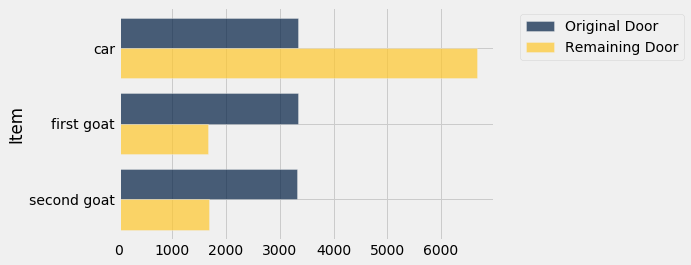

In [11]:
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
combined.barh(0)